In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def calculate_coefficient(f, a, b, n_modes, x):
    """
    Rozwijanie funkcji `f` w sinusy na przedziale `(a, b)` przy użyciu podanych modów.
    - a, b: lewy i prawy kraniec przedziału
    - n_modes: liczba modów do użycia
    
    Zwraca współczynniki rozwinięcia
    """
    modes = np.arange(1, n_modes+1)
    a = np.concatenate(([0], (2 / (b - a)) * np.trapz(f(x) * np.sin(modes[:, None] * x), x, axis=1)))
    return a


def calculate_result(a, x):
    """
    Odtworzenie funkcji ze współczynników rozwinięcia `a` dla wartości `x`.
    - a: współczynniki rozwinięcia
    - x: wartości, dla których odtwarzana jest funkcja
    
    Zwraca odtworzoną funkcję
    """
    return a[0] / 2 + np.sum(a[1:] * np.sin(x[:, None] * np.arange(1, len(a))[None, :]), axis=1)

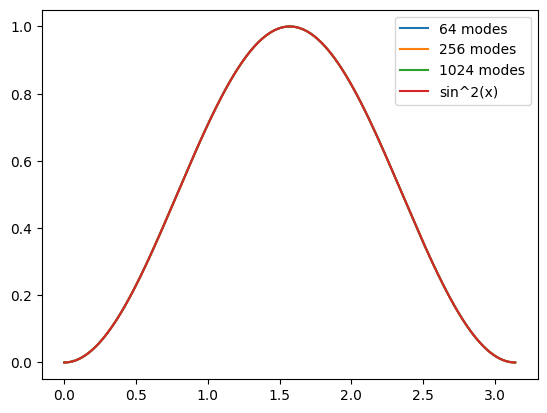

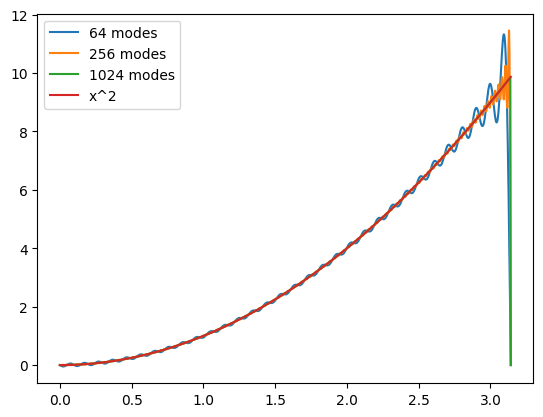

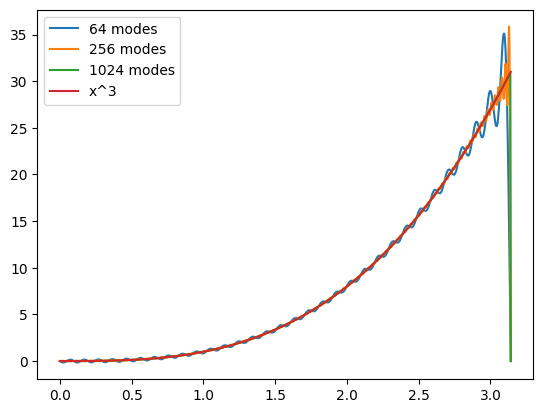

In [15]:
### ZADANIE 1

# Definiowanie odpowiednich funkcji
def f(x):
  return np.sin(x)**2
def g(x):
  return x**2
def h(x):
  return x**3

# Podany przedział
a = 0
b = np.pi

# Talica argumentów
x = np.linspace(a, b, 1024)

# Podane mody
n_modes = [64, 256, 1024]

# Funkcja do rysowania wykresów z użyciem zdefiniowanych funkcji
def result(f,name):
    for n in n_modes:
        a_coeffs = calculate_coefficient(f, a, b, n, x)
        y = calculate_result(a_coeffs, x)
        plt.plot(x, y, label=f"{n} modes")

    plt.plot(x, f(x), label=name)
    plt.legend()
    plt.show()

result(f, "sin^2(x)")
result(g, "x^2")
result(h, "x^3")

In [16]:
### ZADANIE 3

# Definiowanie funkcji
def f(x):
  y = np.where((a <= x) & (x <= b) | (c <= x) & (x <= d), -1, 0)
  return y

# Przedział (jakiś spełniający wymagania)
a = -1
b = 0
c = 1
d = 2

n_modes = 1024

# Tablica argumentów
x = np.linspace(a, d, 1000)

a_coeffs = calculate_coefficient(f, a, d, n_modes, x)
y = calculate_result(a_coeffs, x)

# plt.plot(x, y, label=f"{1024} modes")
# plt.legend()
# plt.show()


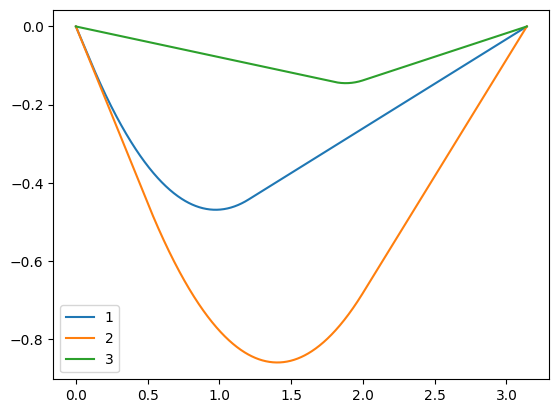

In [17]:
### ZADANIE 3
N = 1024

def calculate_coefficient(f, n):
    a = []
    for i in range(1, n+1):
        a.append(2 * np.trapz(f(x) * np.sin(i*x), x)/(np.pi*i**2))
    return a

def calculate_result(a, x):
    y = np.zeros_like(x)
    for i in range(len(a)):
        y += a[i] * np.sin((i+1)*x)
    return y

# 'Szablon' dla funkcji, można zmieniać przedziałe
def template(x: np.array, alpha, beta, gamma, delta) -> np.array:
    f = np.zeros_like(x)
    for i in range(len(f)):
        if alpha < i*np.pi/N < beta or gamma < i*np.pi/N < delta:
            f[i] = -1
    return f

# Trzy funkcje o różnych przedziałach
def h(x: np.array) -> np.array:
    return template(x, -1, -0.1, 0.1, 1.2)
def g(x: np.array) -> np.array:
    return template(x, -1, -0.5, 0.5, 2)
def p(x: np.array) -> np.array:
    return template(x, -1, -0.9, 1.8, 2)

# Talica argumentów
x = np.linspace(0, np.pi, N)

a1 = calculate_coefficient(h, N)
a2 = calculate_coefficient(g, N)
a3 = calculate_coefficient(p, N)
y1 = calculate_result(a1, x)
y2 = calculate_result(a2, x)
y3 = calculate_result(a3, x)
plt.plot(x, y1, label="1")
plt.plot(x, y2, label="2")
plt.plot(x, y3, label="3")
plt.legend()
plt.show()